# Assigment 
By: Stephanie Dominguez
Cohort 1

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot  as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model #Linear regression to see models and testings
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
#GradientBoostingRegressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor # Model who gave the best result, model used in this template

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file =  'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice_chef = pd.read_excel(file)


In [3]:
# building a base model

# blueprinting a model type
#print("""REVENUE ~ apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE']""")
lm_price_qual = smf.ols(formula = """REVENUE ~ apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE']""",
                        data = apprentice_chef)


# telling Python to run the data through the blueprint
results = lm_price_qual.fit()


# printing the results
print(results.summary())

columns_name_int_float = [ 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']
for name in columns_name_int_float:
    formula_ = f"""REVENUE ~ apprentice_chef['{name}']"""
    lm_price_qual = smf.ols(formula = formula_,
                        data = apprentice_chef)


    # telling Python to run the data through the blueprint
    results = lm_price_qual.fit()


    # printing the results
    print(results.summary())
    

    

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     20.30
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           7.01e-06
Time:                        19:33:26   Log-Likelihood:                -16445.
No. Observations:                1946   AIC:                         3.289e+04
Df Residuals:                    1944   BIC:                         3.291e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 0.0001729
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.990
Time:                        19:33:26   Log-Likelihood:                -16455.
No. Observations:                1946   AIC:                         3.291e+04
Df Residuals:                    1944   BIC:                         3.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

/Users/stephaniedominguezandrade/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/stephaniedominguezandrade/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/stephaniedominguezandrade/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning: Adding an

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

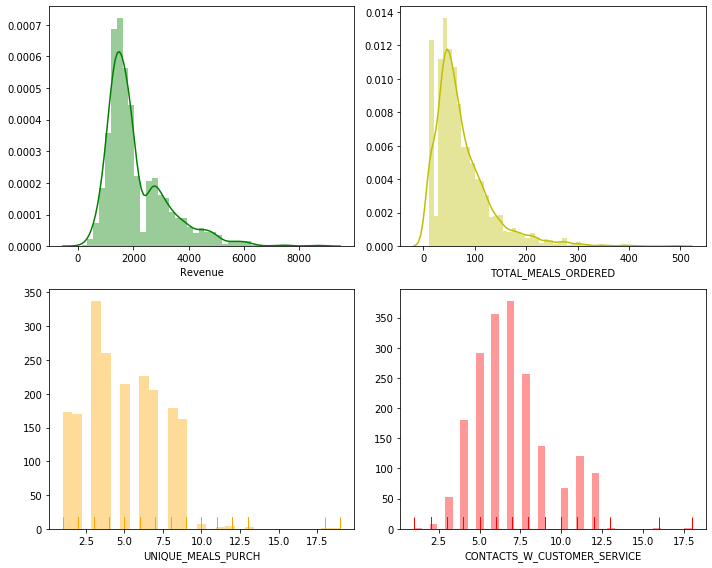

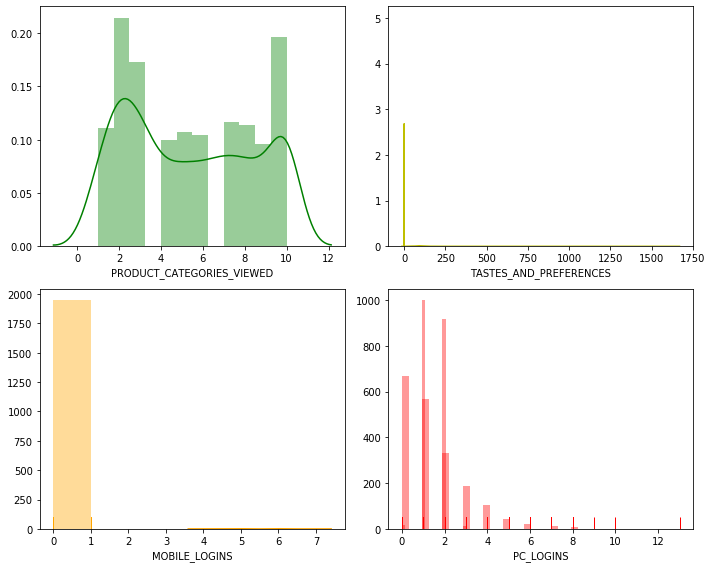

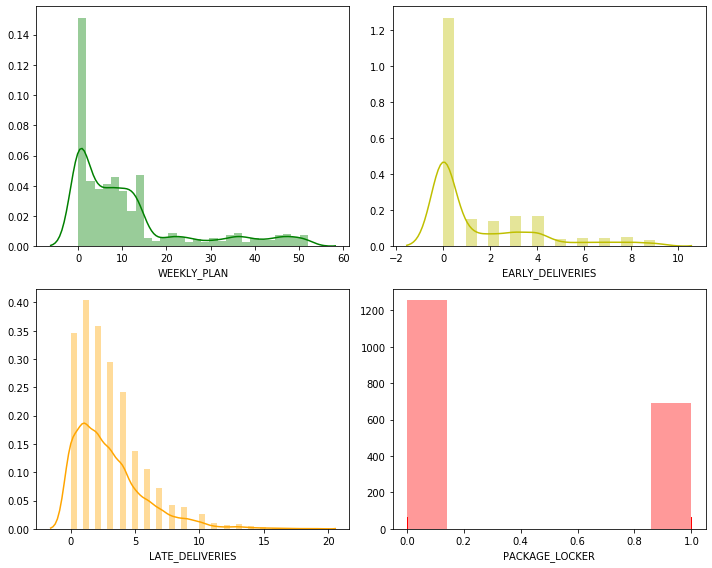

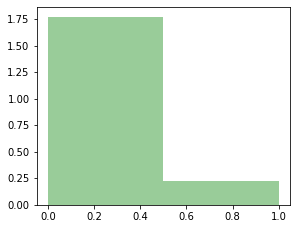

In [3]:
# OUTLIERS ANALYSIS
########################

########################
# Visual EDA (Histograms)
########################

def plot_visual_eda_histogram():
    #plot for revenue
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(apprentice_chef['REVENUE'],
             bins  = 'fd',
             color = 'g')
    plt.xlabel('Revenue')

    ########################
    #plot for TOTAL_MEALS_ORDERED
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('TOTAL_MEALS_ORDERED')

    ########################
    #plot for UNIQUE_MEALS_PURCH
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
    plt.xlabel('UNIQUE_MEALS_PURCH')

    ########################
    #plot fot CONTACTS_W_CUSTOMER_SERVICE
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Histograms 1 of 6.png')


    #######################
    ########################
    #plot for PRODUCT_CATEGORIES_VIEWED
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(apprentice_chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
    plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

    ########################
    #plot for AVG_TIME_PER_SITE_VISIT
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('AVG_TIME_PER_SITE_VISIT')

    ########################
    #plot for MOBILE_NUMBER
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['MOBILE_NUMBER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
    plt.xlabel('MOBILE_NUMBER')

    ########################
    #plot fot CONTACTS_W_CUSTOMER_SERVICE
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('CANCELLATIONS_BEFORE_NOON')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Histograms 2 of 6.png')

    #######################
    ########################
    #plot for CANCELLATIONS_AFTER_NOON


    ########################
    #plot for TASTES_AND_PREFERENCES
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('TASTES_AND_PREFERENCES')

    ########################
    #plot for MOBILE_LOGINS
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'orange')
    plt.xlabel('MOBILE_LOGINS')

    ########################
    #plot fot PC_LOGINS
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('PC_LOGINS')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Histograms 3 of 6.png')

    #######################
    ########################
    #plot for WEEKLY_PLAN
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(apprentice_chef['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
    plt.xlabel('WEEKLY_PLAN')

    ########################
    #plot for EARLY_DELIVERIES
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('EARLY_DELIVERIES')

    ########################
    #plot for LATE_DELIVERIES
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'orange')
    plt.xlabel('LATE_DELIVERIES')

    ########################
    #plot fot PACKAGE_LOCKER
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['PACKAGE_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('PACKAGE_LOCKER')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Histograms 4 of 6.png')

    #######################
    ########################
    #plot for REFRIGERATED_LOCKER
    fig, ax1 = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(apprentice_chef['REFRIGERATED_LOCKER'],
             bins  = 2,
             color = 'g')
    plt.xlabel('REFRIGERATED_LOCKER')

    ########################
    #plot for FOLLOWED_RECOMMENDATIONS_PCT
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

    ########################
    #plot for AVG_PREP_VID_TIME
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'orange')
    plt.xlabel('AVG_PREP_VID_TIME')

    ########################
    #plot fot LARGEST_ORDER_SIZE
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('LARGEST_ORDER_SIZE')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Histograms 5 of 6.png')

    #######################
    ########################
    #plot for MASTER_CLASSES_ATTENDED
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(apprentice_chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'g')
    plt.xlabel('MASTER_CLASSES_ATTENDED')

    ########################
    #plot for MEDIAN_MEAL_RATING
    plt.subplot(2, 2, 2)
    sns.distplot(apprentice_chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'y')
    plt.xlabel('MEDIAN_MEAL_RATING')

    ########################
    #plot for AVG_CLICKS_PER_VISIT
    plt.subplot(2, 2, 3)
    sns.distplot(apprentice_chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'orange')
    plt.xlabel('AVG_CLICKS_PER_VISIT')

    ########################
    #plot fot TOTAL_PHOTOS_VIEWED
    plt.subplot(2, 2, 4)
    sns.distplot(apprentice_chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
    plt.xlabel('TOTAL_PHOTOS_VIEWED')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Histograms 6 of 6.png')
plot_visual_eda_histogram()

In [ ]:
fig, ax1 = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice_chef['REFRIGERATED_LOCKER'],
         bins  = 2,
         color = 'g')
plt.xlabel('REFRIGERATED_LOCKER')

In [9]:
# setting outlier thresholds
#thresholds based on graphs an quantile

TOTAL_MEALS_ORDERED_lo         = 11
TOTAL_MEALS_ORDERED_hi         = 250

UNIQUE_MEALS_PURCH_lo          = 1
UNIQUE_MEALS_PURCH_hi          = 9.5

CONTACTS_W_CUSTOMER_SERVICE_lo = 2
CONTACTS_W_CUSTOMER_SERVICE_hi = 12.5

PRODUCT_CATEGORIES_VIEWED_lo   = 1
PRODUCT_CATEGORIES_VIEWED_hi   = 10

AVG_TIME_PER_SITE_VISIT_hi     = 250

CANCELLATIONS_BEFORE_NOON_hi   = 8

EARLY_DELIVERIES_hi            = 8

LATE_DELIVERIES_hi             = 9

AVG_PREP_VID_TIME_lo           = 0
AVG_PREP_VID_TIME_hi           = 300

TOTAL_PHOTOS_VIEWED_hi         = 600

#higgest revenue
REVENUE_hi                     = 8793.75 


##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers


# TOTAL_MEALS_ORDERED
apprentice_chef['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = apprentice_chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][apprentice_chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]
condition_lo = apprentice_chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][apprentice_chef['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_lo]

apprentice_chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice_chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# UNIQUE_MEALS_PURCH
apprentice_chef['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = apprentice_chef.loc[0:,'out_UNIQUE_MEALS_PURCH'][apprentice_chef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]
condition_lo = apprentice_chef.loc[0:,'out_UNIQUE_MEALS_PURCH'][apprentice_chef['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_lo]

apprentice_chef['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice_chef['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
apprentice_chef['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = apprentice_chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = apprentice_chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

apprentice_chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice_chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# PRODUCT_CATEGORIES_VIEWED
apprentice_chef['out_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = apprentice_chef.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][apprentice_chef['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_hi]
condition_lo = apprentice_chef.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][apprentice_chef['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_lo]

apprentice_chef['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice_chef['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# AVG_TIME_PER_SITE_VISIT
apprentice_chef['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = apprentice_chef.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][apprentice_chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

apprentice_chef['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# CANCELLATIONS_BEFORE_NOON
apprentice_chef['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = apprentice_chef.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][apprentice_chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

apprentice_chef['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# EARLY_DELIVERIES
apprentice_chef['out_EARLY_DELIVERIES'] = 0
condition_hi = apprentice_chef.loc[0:,'out_EARLY_DELIVERIES'][apprentice_chef['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

apprentice_chef['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# LATE_DELIVERIES
apprentice_chef['out_LATE_DELIVERIES'] = 0
condition_hi = apprentice_chef.loc[0:,'out_LATE_DELIVERIES'][apprentice_chef['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

apprentice_chef['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# AVG_PREP_VID_TIME
apprentice_chef['out_AVG_PREP_VID_TIME'] = 0
condition_hi = apprentice_chef.loc[0:,'out_AVG_PREP_VID_TIME'][apprentice_chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]
condition_lo = apprentice_chef.loc[0:,'out_AVG_PREP_VID_TIME'][apprentice_chef['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_lo]

apprentice_chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice_chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# TOTAL_PHOTOS_VIEWED_hi
apprentice_chef['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = apprentice_chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][apprentice_chef['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

apprentice_chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Developing Trend-Based Features

In [ ]:
# Visual EDA (Scatterplots)
########################
def plot_visual_eda_Scatterplots():
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = apprentice_chef['TOTAL_MEALS_ORDERED'],
                    y = apprentice_chef['REVENUE'],
                    color = 'g')
    plt.xlabel('TOTAL_MEALS_ORDERED')

    ########################

    plt.subplot(2, 2, 2)
    sns.scatterplot(x = apprentice_chef['UNIQUE_MEALS_PURCH'],
                    y = apprentice_chef['REVENUE'],
                    color = 'y')
    plt.xlabel('UNIQUE_MEALS_PURCH')

    ########################

    plt.subplot(2, 2, 3)
    sns.scatterplot(x = apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'],
                    y = apprentice_chef['REVENUE'],
                    color = 'orange')
    plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

    ########################
    plt.subplot(2, 2, 4)
    sns.scatterplot(x = apprentice_chef['PRODUCT_CATEGORIES_VIEWED'],
                    y = apprentice_chef['REVENUE'],
                    color = 'r')
    plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Scatterplots 1 of 5.png')

    ########################
    ########################

    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = apprentice_chef['AVG_TIME_PER_SITE_VISIT'],
                    y = apprentice_chef['REVENUE'],
                    color = 'g')
    plt.xlabel('AVG_TIME_PER_SITE_VISIT')

    ########################

    plt.subplot(2, 2, 2)
    sns.scatterplot(x = apprentice_chef['CANCELLATIONS_BEFORE_NOON'],
                    y = apprentice_chef['REVENUE'],
                    color = 'y')
    plt.xlabel('CANCELLATIONS_BEFORE_NOON')

    ########################

    plt.subplot(2, 2, 3)
    sns.scatterplot(x = apprentice_chef['CANCELLATIONS_AFTER_NOON'],
                    y = apprentice_chef['REVENUE'],
                    color = 'orange')
    plt.xlabel('CANCELLATIONS_AFTER_NOON')

    ########################
    plt.subplot(2, 2, 4)
    sns.scatterplot(x = apprentice_chef['WEEKLY_PLAN'],
                    y = apprentice_chef['REVENUE'],
                    color = 'r')
    plt.xlabel('WEEKLY_PLAN')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Scatterplots 2 of 5.png')

    ########################
    ########################


    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = apprentice_chef['EARLY_DELIVERIES'],
                    y = apprentice_chef['REVENUE'],
                    color = 'g')
    plt.xlabel('EARLY_DELIVERIES')

    ########################

    plt.subplot(2, 2, 2)
    sns.scatterplot(x = apprentice_chef['LATE_DELIVERIES'],
                    y = apprentice_chef['REVENUE'],
                    color = 'y')
    plt.xlabel('LATE_DELIVERIES')

    ########################

    plt.subplot(2, 2, 3)
    sns.scatterplot(x = apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'],
                    y = apprentice_chef['REVENUE'],
                    color = 'orange')
    plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

    ########################
    plt.subplot(2, 2, 4)
    sns.scatterplot(x = apprentice_chef['AVG_PREP_VID_TIME'],
                    y = apprentice_chef['REVENUE'],
                    color = 'r')
    plt.xlabel('AVG_PREP_VID_TIME')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Scatterplots 3 of 5.png')

    ########################
    ########################

    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = apprentice_chef['LARGEST_ORDER_SIZE'],
                    y = apprentice_chef['REVENUE'],
                    color = 'g')
    plt.xlabel('LARGEST_ORDER_SIZE')

    ########################

    plt.subplot(2, 2, 2)
    sns.scatterplot(x = apprentice_chef['MASTER_CLASSES_ATTENDED'],
                    y = apprentice_chef['REVENUE'],
                    color = 'y')
    plt.xlabel('MASTER_CLASSES_ATTENDED')

    ########################

    plt.subplot(2, 2, 3)
    sns.scatterplot(x = apprentice_chef['MEDIAN_MEAL_RATING'],
                    y = apprentice_chef['REVENUE'],
                    color = 'orange')
    plt.xlabel('MEDIAN_MEAL_RATING')

    ########################
    plt.subplot(2, 2, 4)
    sns.scatterplot(x = apprentice_chef['AVG_CLICKS_PER_VISIT'],
                    y = apprentice_chef['REVENUE'],
                    color = 'r')
    plt.xlabel('AVG_CLICKS_PER_VISIT')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Scatterplots 4 of 5.png')

    ########################
    ########################

    plt.subplot(2, 2, 1)
    sns.scatterplot(x = apprentice_chef['TOTAL_PHOTOS_VIEWED'],
                    y = apprentice_chef['REVENUE'],
                    color = 'r')
    plt.xlabel('TOTAL_PHOTOS_VIEWED')
    plt.tight_layout()
    plt.savefig('apprentice_chef Data Scatterplots 5 of 5.png')
#plot_visual_eda_Scatterplots()

In [ ]:
# setting trend-based thresholds
#thresholds based on scatter plot analisys

AVG_TIME_PER_SITE_VISIT_changes_hi      = 400 # trend changes at this point
CONTACTS_W_CUSTOMER_SERVICE_changes_hi  = 11  # data scatters above this point


TOTAL_MEALS_ORDERED_changes_at          = 0   # data inflated only in this point
PRODUCT_CATEGORIES_VIEWED_changes_at    = 5   # different at 5 higest values
CANCELLATIONS_AFTER_NOON_changes_at     = 3   # Trend changes at this point
LATE_DELIVERIES_changes_at              = 11  # Trend changes at this points
AVG_PREP_VID_TIME_changes_at            = 350 # Trend changes at this points
LARGEST_ORDER_SIZE_changes_at           = 0   # Differnet at 0 revenue of 0


AVG_CLICKS_PER_VISIT_changes_lo         = 8   # trend changes before this point

##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

# developing features (columns) for outliers

########################################
## change above threshold             ##
########################################

# greater than sign

# AVG_TIME_PER_SITE_VISIT
apprentice_chef['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = apprentice_chef.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][apprentice_chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_changes_hi]

apprentice_chef['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
apprentice_chef['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = apprentice_chef.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_changes_hi]

apprentice_chef['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


########################################
## change at threshold                ##
########################################

# double-equals sign

# TOTAL_MEALS_ORDERED
apprentice_chef['change_TOTAL_MEALS_ORDERED'] = 0
condition = apprentice_chef.loc[0:,'change_TOTAL_MEALS_ORDERED'][apprentice_chef['TOTAL_MEALS_ORDERED'] == TOTAL_MEALS_ORDERED_changes_at]

apprentice_chef['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# PRODUCT_CATEGORIES_VIEWED
apprentice_chef['change_PRODUCT_CATEGORIES_VIEWED'] = 0
condition = apprentice_chef.loc[0:,'change_PRODUCT_CATEGORIES_VIEWED'][apprentice_chef['PRODUCT_CATEGORIES_VIEWED'] == PRODUCT_CATEGORIES_VIEWED_changes_at]

apprentice_chef['change_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# CANCELLATIONS_AFTER_NOON
apprentice_chef['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = apprentice_chef.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][apprentice_chef['CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_changes_at]

apprentice_chef['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# AVG_PREP_VID_TIME
apprentice_chef['change_AVG_PREP_VID_TIME'] = 0
condition = apprentice_chef.loc[0:,'change_AVG_PREP_VID_TIME'][apprentice_chef['AVG_PREP_VID_TIME'] == AVG_PREP_VID_TIME_changes_at]

apprentice_chef['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# LARGEST_ORDER_SIZE
apprentice_chef['change_LARGEST_ORDER_SIZE'] = 0
condition = apprentice_chef.loc[0:,'change_LARGEST_ORDER_SIZE'][apprentice_chef['LARGEST_ORDER_SIZE'] == LARGEST_ORDER_SIZE_changes_at]

apprentice_chef['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

########################################
## change above threshold             ##
########################################

# less than sign

# AVG_CLICKS_PER_VISIT
apprentice_chef['change_AVG_CLICKS_PER_VISIT'] = 0
condition = apprentice_chef.loc[0:,'change_AVG_CLICKS_PER_VISIT'][apprentice_chef['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_changes_lo]

apprentice_chef['change_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)




In [ ]:
# building a full model
# blueprinting a model type
lm_full = smf.ols(formula = """ apprentice_chef['REVENUE'] ~ apprentice_chef['CROSS_SELL_SUCCESS'] +
                                apprentice_chef['TOTAL_MEALS_ORDERED'] +
                                apprentice_chef['UNIQUE_MEALS_PURCH'] +
                                apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] +
                                apprentice_chef['PRODUCT_CATEGORIES_VIEWED'] +
                                apprentice_chef['AVG_TIME_PER_SITE_VISIT'] +
                                apprentice_chef['MOBILE_NUMBER'] +
                                apprentice_chef['CANCELLATIONS_BEFORE_NOON'] +
                                apprentice_chef['CANCELLATIONS_AFTER_NOON'] +
                                apprentice_chef['TASTES_AND_PREFERENCES'] +
                                apprentice_chef['MOBILE_LOGINS'] +
                                apprentice_chef['PC_LOGINS'] +
                                apprentice_chef['WEEKLY_PLAN'] +
                                apprentice_chef['EARLY_DELIVERIES'] +
                                apprentice_chef['LATE_DELIVERIES'] +
                                apprentice_chef['PACKAGE_LOCKER'] +
                                apprentice_chef['REFRIGERATED_LOCKER'] +
                                apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                apprentice_chef['AVG_PREP_VID_TIME'] +
                                apprentice_chef['LARGEST_ORDER_SIZE'] +
                                apprentice_chef['MASTER_CLASSES_ATTENDED'] +
                                apprentice_chef['MEDIAN_MEAL_RATING'] +
                                apprentice_chef['AVG_CLICKS_PER_VISIT'] +
                                apprentice_chef['TOTAL_PHOTOS_VIEWED'] +
                                apprentice_chef['out_TOTAL_MEALS_ORDERED'] +
                                apprentice_chef['out_UNIQUE_MEALS_PURCH'] +
                                apprentice_chef['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                apprentice_chef['out_AVG_TIME_PER_SITE_VISIT'] +
                                apprentice_chef['out_CANCELLATIONS_BEFORE_NOON'] +
                                apprentice_chef['out_EARLY_DELIVERIES'] +
                                apprentice_chef['out_LATE_DELIVERIES'] +
                                apprentice_chef['out_AVG_PREP_VID_TIME'] +
                                apprentice_chef['out_TOTAL_PHOTOS_VIEWED'] +
                                apprentice_chef['change_AVG_TIME_PER_SITE_VISIT'] +
                                apprentice_chef['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                apprentice_chef['change_PRODUCT_CATEGORIES_VIEWED'] +
                                apprentice_chef['change_CANCELLATIONS_AFTER_NOON'] +
                                apprentice_chef['change_LARGEST_ORDER_SIZE'] +
                                apprentice_chef['change_AVG_CLICKS_PER_VISIT']""",
                                data = apprentice_chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()

# printing the results
#results_full.summary()

apprentice_chef.info()

In [ ]:
# preparing response variable data
apprentice_chef_target = apprentice_chef.loc[:, 'REVENUE']
#creating the list for independent variables
x_variables = ['TOTAL_MEALS_ORDERED', 
               'UNIQUE_MEALS_PURCH', 
               'CONTACTS_W_CUSTOMER_SERVICE', 
               'AVG_TIME_PER_SITE_VISIT',
               'TASTES_AND_PREFERENCES',
               'MOBILE_LOGINS', 
               'AVG_PREP_VID_TIME', 
               'LARGEST_ORDER_SIZE', 
               'MASTER_CLASSES_ATTENDED', 
               'MEDIAN_MEAL_RATING', 
               'AVG_CLICKS_PER_VISIT',
               'out_TOTAL_MEALS_ORDERED',
               'out_UNIQUE_MEALS_PURCH',
               'out_CANCELLATIONS_BEFORE_NOON',
               'out_AVG_PREP_VID_TIME',
               'out_TOTAL_PHOTOS_VIEWED',
               'change_AVG_TIME_PER_SITE_VISIT', 
               ]
#Creating new data set with the independent variable called apprentice_chef_data
apprentice_chef_data = apprentice_chef[x_variables]

#INSTANTIATING a model object: StandardScaler()
apprentice_chef_model = StandardScaler()


# FITTING the training data
apprentice_chef_model.fit(apprentice_chef_data)


# TRANSFORMING  model
apprentice_chef_X_scaled = apprentice_chef_model.transform(apprentice_chef_data)


# converting to DataFrame
apprentice_chef_model_scaled_df = pd.DataFrame(apprentice_chef_X_scaled)

X_train, X_test, y_train, y_test = train_test_split(apprentice_chef_model_scaled_df,
                                                    apprentice_chef_target,
                                                    test_size = 0.25,
                                                    random_state = 222)


# Instantiating a GradientBoostingRegressor object
apprentice_chef_model = GradientBoostingRegressor(learning_rate = 0.1,
                                n_estimators = 100,
                                random_state = 222,
                                max_depth = 3,
                                max_features = 'auto'
                                 )

# Fitting this object with training data
apprentice_chef_model.fit(X_train, y_train)

# Predicting on the test set
apprentice_chef_model_pred = apprentice_chef_model.predict(X_test)

# SCORING the results
print("GradientBoostingRegressor")
print('Training Score:', apprentice_chef_model.score(X_train, y_train).round(3))
print('Testing Score:',  apprentice_chef_model.score(X_test, y_test).round(3))

In [ ]:
# INSTANTIATING a model object  Ridge()
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)
print("Ridge")
print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

In [ ]:
# INSTANTIATING a model object Lasso()
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)
print("Lasso")
print('Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

In [ ]:
# INSTANTIATING a model object ARDRegression
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_model.predict(X_test)

print("ARDRegression")
print('Training Score:', ard_model.score(X_train, y_train).round(4))
print('Testing Score:',  ard_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  = ard_model.score(X_test, y_test).round(4)

In [ ]:
# INSTANTIATING a KNN model object KNeighborsRegressor
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_reg.predict(X_test)


# SCORING the results
print("KNeighborsRegressor")
print('Training Score:', knn_reg.score(X_train, y_train).round(4))
print('Testing Score:',  knn_reg.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)

In [ ]:
#Creating categorical data from columns mails
#see if makes a different the type of mail
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice_chef.iterrows():
    
    # splitting email domain at ''@'
    split_email = apprentice_chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# safety measure in case of multiple concatenations
apprentice_chef_email = apprentice_chef


# renaming column to concatenate
email_df.columns = ['0' , 'personal_email_domain']


# concatenating personal_email_domain with apprentice_chef_email DataFrame
apprentice_chef_email = pd.concat([apprentice_chef_email, email_df['personal_email_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
#apprentice_chef_email.loc[: ,'personal_email_domain'].value_counts()

# email domain types
personal_email_domains = ['@gmail.com',
                            '@yahoo.com',
                            '@protonmail.com']

professional_email_domains  = [  '@mmm.com',
                            '@amex.com',
                            '@apple.com',
                            '@boeing.com',
                            '@caterpillar.com',
                            '@chevron.com',
                            '@cisco.com',
                            '@cocacola.com',
                            '@disney.com',
                            '@dupont.com',
                            '@exxon.com',
                            '@ge.org' ,
                            '@goldmansacs.com',
                            '@homedepot.com',
                            '@ibm.com',
                            '@intel.com',
                            '@jnj.com',
                            '@jpmorgan.com',
                            '@mcdonalds.com',
                            '@merck.com',
                            '@microsoft.com',
                            '@nike.com',
                            '@pfizer.com',
                            '@pg.com',
                            '@travelers.com',
                            '@unitedtech.com',
                            '@unitedhealth.com',
                            '@verizon.com',
                            '@visa.com',
                            '@walmart.com']
junk_email_domains = ['@me.com',
                        '@aol.com', 
                        '@hotmail.com', 
                        '@live.com', 
                        '@msn.com', 
                        '@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in apprentice_chef_email['personal_email_domain']:
    
    if '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')
        

    elif '@' + domain in professional_email_domains:
        placeholder_lst.append('professional')
        
    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')


    else:
            print('Unknown')


# concatenating with original DataFrame
apprentice_chef_email['domain_group'] = pd.Series(placeholder_lst)


# checking results
apprentice_chef_email['domain_group'].value_counts()

#creating new columns for categorical data 
#adding it to original data set apprentice_chef
apprentice_chef['domain_group'] = apprentice_chef_email['domain_group']


In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice_chef['domain_group'],
                y = apprentice_chef['REVENUE'],
                color = 'g')
plt.xlabel('domain_group')

In [ ]:

apprentice_chef.groupby('domain_group')['CROSS_SELL_SUCCESS'].sum().round(2)